# Best Neighborhood to Raise a Child - Playgrounds

#### This data set will help to determine the best neighborhood in Pittsburgh to raise a child by revealing which neighborhood has the most playgrounds within its borders. Within the playground data set, there was no indication of what types of play-areas were at each playground. Because of this, the playgrounds are not given any weight, and the neighborhood supremacy in terms of playgrounds is based off of simply quantity of playgrounds.

## Setting Up the Data

To start, I imported in all the possible packages I would need to use

In [177]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

I loaded in the data from the playgrounds csv file and printed a sample of the data

In [178]:
data = pd.read_csv("Playgrounds.csv")

data.sample(5)

,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
57,561282176,Leolyn Playground,NaN,Parks - Southern,Leolyn Park,LEOLYN ST,https://tools.wprdc.org/images/pittsburgh/play...,Carrick,4,29,42003290200,3,29,3,4-12,40.399263,-79.986056
112,1243066156,Warrington Playground,NaN,Parks - Southern,Warrington Park,E WARRINGTON AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beltzhoover,3,18,42003562400,5,18,3,4-5,40.421306,-80.001238
85,698726686,Pauline Playground,NaN,Parks - Western,Pauline Park,PAULINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003192000,5,19,6,4-28,40.404719,-80.025795
86,1540689442,Paulson Playground,NaN,Parks - Eastern,Paulson Park,PAULSON AVE,https://tools.wprdc.org/images/pittsburgh/play...,Lincoln-Lemington-Belmar,9,12,42003120300,2,12,5,3-15,40.469026,-79.900381
20,130973977,Chartiers Playground,NaN,Parks - Western,Chartiers Park,CHARTIERS AVE,https://tools.wprdc.org/images/pittsburgh/play...,Windgap,2,28,42003563000,5,28,6,1-16,40.457028,-80.075011


Most playgrounds had an image of it attached in the dataframe which I thought was very interesting, some of them are pictured below. Most looked very similar, which was another reason I decided to not give any playgrounds more weight over another

![alt text](https://tools.wprdc.org/images/pittsburgh/playgrounds/Albert_Graham_Playground.jpg "Albert Graham Playground")

![alt text](https://tools.wprdc.org/images/pittsburgh/playgrounds/Mellon_Playground.jpg "Mellon Playground")

![alt text](https://tools.wprdc.org/images/pittsburgh/playgrounds/Alton_Playground.jpg "Alton Playground")

There was lots of information that would not have been helpful for this research, so cut those columns out

In [179]:
data.pop('id')
data.pop('type')
data.pop('maintenance_responsibility')
data.pop('council_district')
data.pop('ward')
data.pop('tract')
data.pop('public_works_division')
data.pop('pli_division')
data.pop('police_zone')
data.pop('fire_zone')

0      4-28
1       2-1
2      1-21
3      4-28
4       2-5
       ... 
120    4-23
121     3-5
122    4-16
123    3-10
124     1-5
Name: fire_zone, Length: 125, dtype: object

Printing a sample of the new data frame, with only the necesary information

In [180]:
data.head(5)

,name,park,street,image,neighborhood,latitude,longitude
0,Able Long Playground,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,40.408365,-80.028445
1,Albert Graham Playground,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,40.440519,-79.984137
2,Alpine Playground,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Central Northside,40.457707,-80.012952
3,Alton Playground,Alton Park,ANDICK WAY,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,40.414137,-80.021605
4,Ammon Playground,Ammon Park,MEMORY LN,https://tools.wprdc.org/images/pittsburgh/play...,Bedford Dwellings,40.449037,-79.978064


Graphing the neighborhoods based on their quanitity of playground

As you can see, there is already a clear winner, but let's clean up the data more

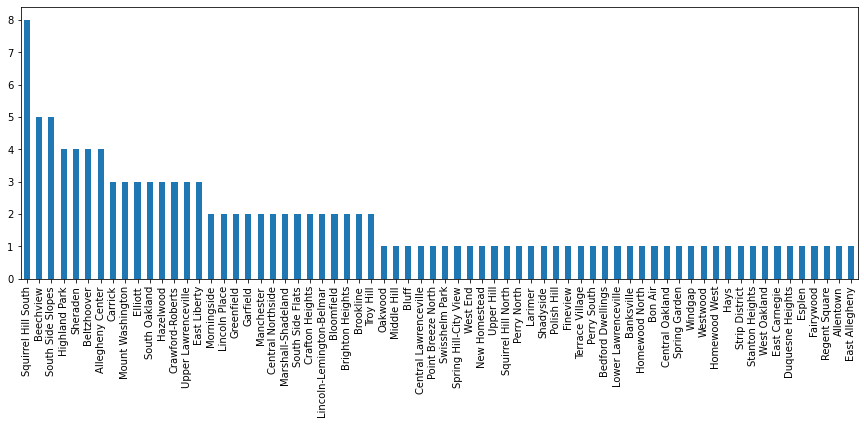

In [181]:
data['neighborhood'].value_counts().plot.bar(figsize=(15,5))

## Cleaning Up the Data

Turning the neighborhoods and their quantity or playgrounds into a dictionary

In [182]:
neighborhoods_dict = dict()

for row in data['neighborhood']:
    
    if row not in neighborhoods_dict:
        neighborhoods_dict[row] = 1
    else:
        neighborhoods_dict[row] = neighborhoods_dict[row] + 1

neighborhoods_dict

{'Beechview': 5,
 'Crawford-Roberts': 3,
 'Central Northside': 2,
 'Bedford Dwellings': 1,
 'South Side Slopes': 5,
 'South Side Flats': 2,
 'Lower Lawrenceville': 1,
 'Banksville': 1,
 'Homewood North': 1,
 'Bon Air': 1,
 'Central Oakland': 1,
 'Brighton Heights': 2,
 'Brookline': 2,
 'Hazelwood': 3,
 'Squirrel Hill South': 8,
 'Spring Garden': 1,
 'Lincoln-Lemington-Belmar': 2,
 'Windgap': 1,
 'Troy Hill': 2,
 'Westwood': 1,
 'Perry South': 1,
 'Homewood West': 1,
 'Allegheny Center': 4,
 'Strip District': 1,
 'Stanton Heights': 1,
 'Crafton Heights': 2,
 'West Oakland': 1,
 'East Carnegie': 1,
 'Duquesne Heights': 1,
 'East Liberty': 3,
 'Esplen': 1,
 'Fairywood': 1,
 'Highland Park': 4,
 'Upper Lawrenceville': 3,
 'Fineview': 1,
 'Regent Square': 1,
 'Garfield': 2,
 'Greenfield': 2,
 'South Oakland': 3,
 'Allentown': 1,
 'Hays': 1,
 'Elliott': 3,
 'Morningside': 2,
 'Terrace Village': 1,
 'Larimer': 1,
 'Carrick': 3,
 'Central Lawrenceville': 1,
 'Lincoln Place': 2,
 'Manchester': 

#### (Detour to create a data frame to graph later with geo pandas)

Turning the dictionary into a data set containing only the neighborhoods and their quantity of playgrounds, wich will be helpful for graphing this data onto a map later (method that turns dictionary to a data frame was not helpful as it used the keys as the row indexes)

In [183]:
# turning the keys (neighborhoods) into a list 
hoods_list = list() 

for key in neighborhoods_dict:
    hoods_list.append(key)
    

In [184]:
# turning the values (quantity of playgrounds) into a list 
quantity_list = list()

for key in neighborhoods_dict:
    quantity_list.append(neighborhoods_dict[key])
    

In [186]:
# creating a dataframe with the neighborhoods and quantities as columns
quantity_data = {'neighborhood':hoods_list,
        'quantity':quantity_list}
 
# Create DataFrame
pg_quantity = pd.DataFrame(quantity_data)

In [187]:
pg_quantity.head()

,neighborhood,quantity
0,Beechview,5
1,Crawford-Roberts,3
2,Central Northside,2
3,Bedford Dwellings,1
4,South Side Slopes,5


#### Continuing to clean up the data

Cutting the dictionary to only include neigbhorhoods with large amounts of playgrounds

In [99]:
cut_dict = neighborhoods_dict
count = 0
keys_list = list(cut_dict)

while count < len(keys_list):
    key = keys_list[count]
    
    if cut_dict[key] < 4:
        cut_dict.pop(key)

    count += 1


In [100]:
cut_dict

{'Beechview': 5,
 'South Side Slopes': 5,
 'Squirrel Hill South': 8,
 'Allegheny Center': 4,
 'Highland Park': 4,
 'Sheraden': 4,
 'Beltzhoover': 4}

Making a bar chart to visualize the top contenders for best neighborhood in terms of playgrounds, with Squirrel Hill South leading with 8 playgrounds

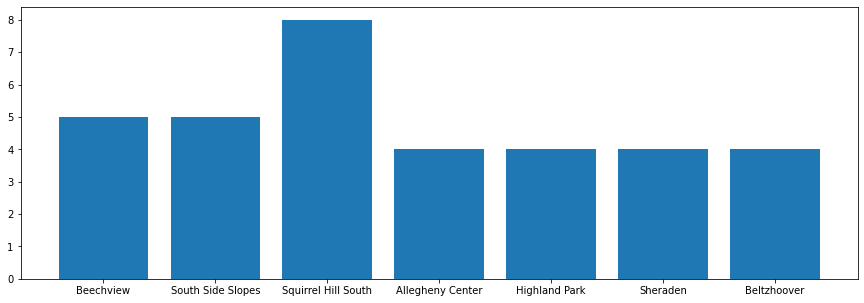

In [101]:
neighborhoods = list(cut_dict.keys())
playgrounds = list(cut_dict.values())
           
#plt.bar(neighborhoods, playgrounds)

plt.figure(figsize=(15, 5))
plt.bar(neighborhoods, playgrounds)
plt.show()

## Geo Pandas!

Loading in the map of neighborhoods around Pittsburgh

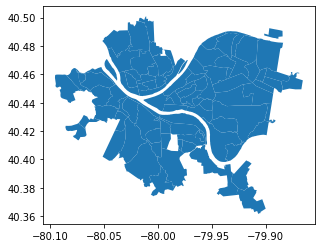

In [102]:
neighborhoods_map = geopandas.read_file("Neighborhoods_.shp")
neighborhoods_map.plot() # plot the geopandas dataframe

Merging the map with the data frame that contained only the neighborhoods and their corresponding quantity of playgrounds

In [188]:
playgrounds_map = neighborhoods_map.merge(pg_quantity, how='left', left_on='hood', right_on='neighborhood')
playgrounds_map[['hood','quantity','geometry']].head(10)

,hood,quantity,geometry
0,Chateau,NaN,"POLYGON ((-80.02999 40.45909, -80.02989 40.458..."
1,Summer Hill,NaN,"POLYGON ((-80.01078 40.49975, -80.01073 40.499..."
2,Northview Heights,NaN,"POLYGON ((-80.00327 40.48271, -80.00325 40.482..."
3,Spring Hill-City View,1.0,"POLYGON ((-79.99761 40.47460, -79.99761 40.474..."
4,Perry South,1.0,"POLYGON ((-80.01422 40.47745, -80.01435 40.477..."
5,Fineview,1.0,"POLYGON ((-80.00198 40.46814, -80.00129 40.467..."
6,Central Northside,2.0,"POLYGON ((-80.00228 40.45868, -80.00228 40.458..."
7,Spring Garden,1.0,"POLYGON ((-79.98687 40.47413, -79.98598 40.472..."
8,Troy Hill,2.0,"MULTIPOLYGON (((-79.97766 40.46653, -79.97771 ..."
9,East Allegheny,1.0,"POLYGON ((-79.99288 40.45745, -79.99286 40.457..."


Finally, Graph the data with a colored heat map to view where playgrounds are most present!

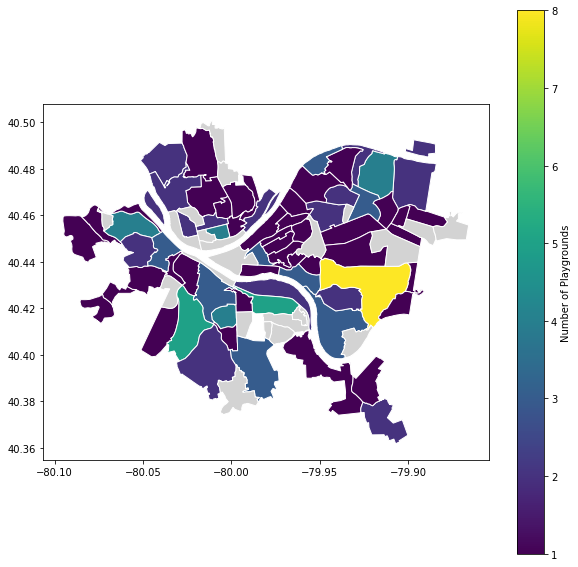

In [176]:
playgrounds_map.plot(column='quantity', # data to be used for shading
               cmap='viridis',              # color palette
               edgecolor="white",        # outline neighborhoods in white
               legend=True,              # show legend
               legend_kwds={'label': "Number of Playgrounds"}, # legend label
               figsize=(10, 10),         # legend size
               missing_kwds={"color": "lightgrey"} # neighborhoods with no data provided (or zero playgrounds) to gray
               )

#### As we can clearly see, Squirrel Hill South is the winner, containing the most playgrounds of any neighborhood in Pittsburgh. I used multiple data frames and graphs, and also and cut down the data to make this conclusion more comprehensible. The winner's success could be due to the fact that it is so large, or that it contains a large quantity of parks. Either way, in terms of quantity of playgrounds, Squirrel Hill South is the best neighborhood to raise a child. 